In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
# from seirsplus.models import *
import networkx
from seirsmodel import *
from seirsnetmodel import *
import matplotlib.pyplot as pyplot

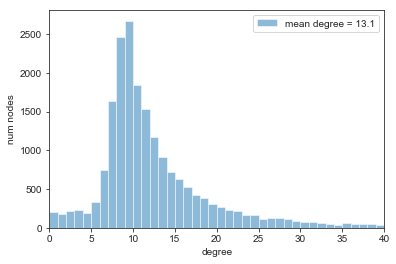

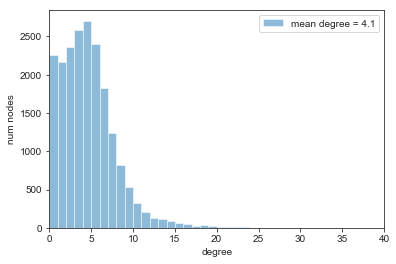

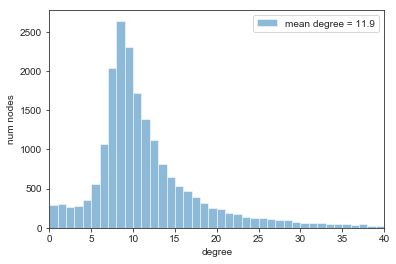

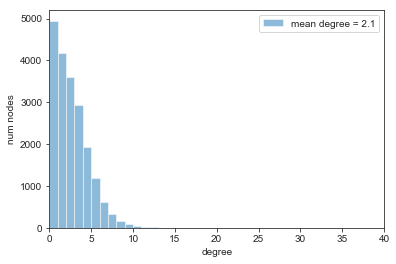

In [4]:
numNodes = 20000
max_degree_plot = 40
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)

# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=max_degree_plot)

# Social distancing interactions:
G_distancing_strict = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing_strict, max_degree=max_degree_plot)

# Light Social distancing interactions:
G_distancing_light = custom_exponential_graph(baseGraph, scale=70)
plot_degree_distn(G_distancing_light, max_degree=max_degree_plot)

# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=max_degree_plot)

In [5]:
num_iters = 200
# mu_I=0.0004 # μI: rate of mortality from the disease (deaths per infectious individual per time)
mu_I=0.000514 # impartita la 100
mu_H=0.33 #
mu_ICU=0.32 #

initI=20
initN=numNodes
# beta=0.147
# sigma=1/5.2
# gamma=1/12.39
beta = 0.147 # β: rate of transmission (transmissions per S-I contact per time)
sigma = 1/5.2 # σ: rate of progression (inverse of incubation period)
gamma = 1/12.39 # γ: rate of recovery (inverse of infectious period)

# ξ: rate of re-susceptibility (inverse of temporary immunity period; 0 if permanent immunity)


#  A. Fara Interventii

t = 0.24
t = 50.07
t = 100.03
t = 150.00
t = 200.01


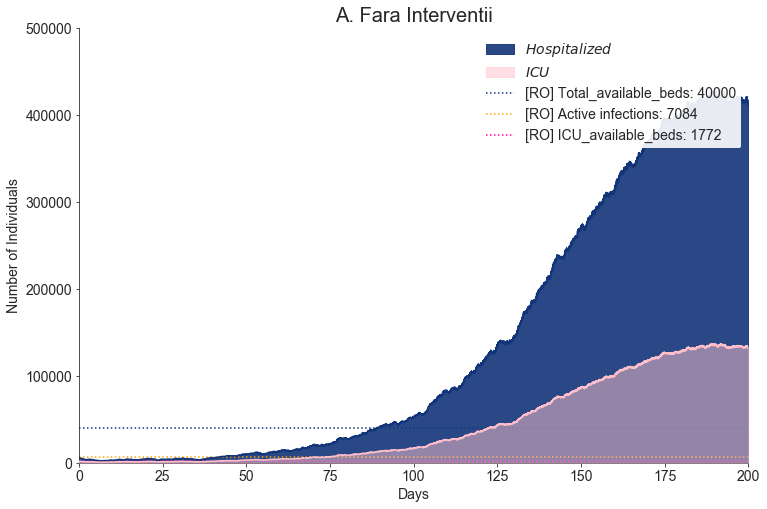

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a78530438>)

In [371]:
model_no_interventions = SEIRSNetworkModel(G=G_normal,
                              beta=beta,
                              sigma=sigma,
                              gamma=gamma,
                              mu_I=mu_I,
                              mu_H=mu_H, 
                              mu_ICU=mu_ICU,
                              Q=G_quarantine, 
                              theta_E =0, 
                              theta_I =0, 
                              phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                              phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                              psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                              psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals                              psi_E=1.0, 
                              p=0.5, # probability of global interactions (network locality)
                              q=0.5, # probability of global interactions for quarantined individuals
                              initI=initI)
model_no_interventions.run(T=num_iters, print_interval=50)
model_no_interventions.figure_infections(
    title="A. Fara Interventii",
    ylim=500000,
    plot_F=False,
    plot_I=False,
    plot_E=False,
    plot_percentages=False,
)

# B. Distantare sociala

|**Fara restrictii** |       **Stricta**      | **Relaxata**|
|:---:|:-------------:|:---:|
|primele 20 zile     |   ziua 20 - ziua 80    | dupa ziua 80|

* ziua 20 = 16 aprilie, ziua declararii Starii de Urgenta
* ziua 80 = 15 mai, ziua incetarii Starii de Urgenta



t = 0.02
[Checkpoint: Updating parameters]
t = 50.03
[Checkpoint: Updating parameters]
t = 100.01
t = 150.02
t = 200.00


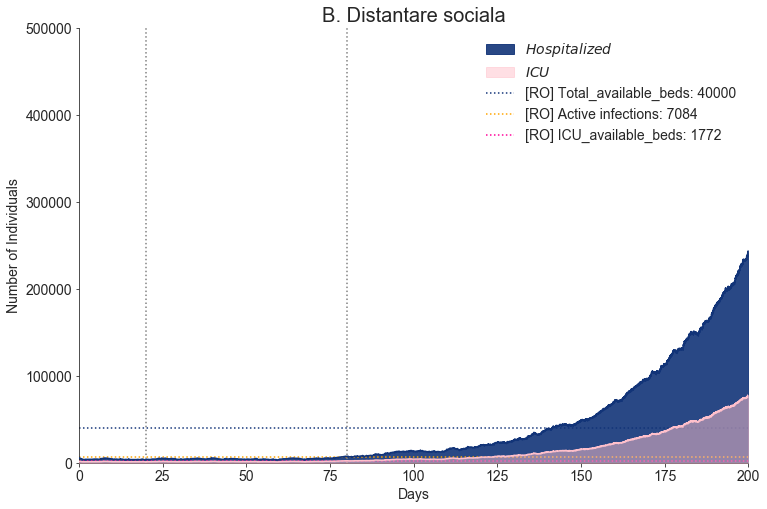

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a6f5fc3c8>)

In [372]:
model_social_dist = SEIRSNetworkModel(
    G       =G_normal, 
                          beta    =beta,
                          sigma   =sigma,
                          gamma   =gamma, 
                          mu_I    =mu_I,
                          mu_H    =mu_H, 
                          mu_ICU  =mu_ICU,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          Q       =G_quarantine,  # the interactions after a positive test
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                          phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                          psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals
                          p=0.5, # probability of global interactions (network locality)
                          q=0.5, # probability of global interactions for quarantined individuals
                          initI=initI,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
checkpoints = None
# 16 martie/Stare de Urgenta start = ziua 20
# 25 aprilie = ziua 60
# 15 mai = ziua 80
# 1 mai = ziua 66

checkpoints = {'t':       [20, 80], 
               'G':       [G_distancing_strict, G_distancing_light],
               'p':       [0.1, 0.5], # probability of global interactions (network locality)
               'q':       [0.1, 0.5], # probability of global interactions (network locality)
              }

model_social_dist.run(T=num_iters, print_interval=50, checkpoints=checkpoints)
model_social_dist.figure_infections(
    plot_percentages=False,
    title="B. Distantare sociala",
    ylim=500000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)
    

# C. Distantare sociala + (minimal) (Testare + Contact Tracing)

t = 0.01
[Checkpoint: Updating parameters]
t = 50.00
[Checkpoint: Updating parameters]
t = 100.06
t = 150.04
t = 200.00


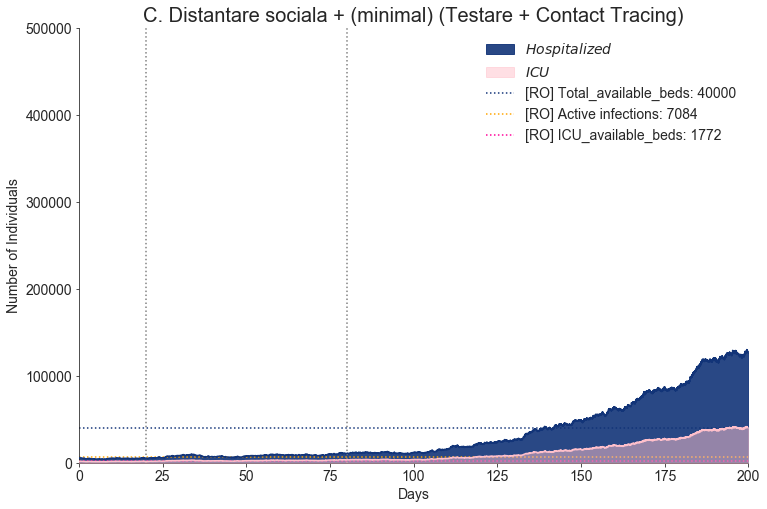

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a7b627c18>)

In [393]:
model_min_test_trace = SEIRSNetworkModel(G       =G_normal, 
                          beta    =beta,
                          sigma   =sigma,
                          gamma   =gamma, 
                          mu_I    =mu_I,
                          mu_H    =mu_H, 
                          mu_ICU  =mu_ICU,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          Q       =G_quarantine,  # the interactions after a positive test
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                          phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                          psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals
                          p=0.5, # probability of global interactions (network locality)
                          q=0.5, # probability of global interactions for quarantined individuals
                          initI=initI,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
checkpoints = None
# 16 martie/Stare de Urgenta start = ziua 20
# 25 aprilie = ziua 60
# 15 mai = ziua 80
# 1 mai = ziua 66

checkpoints = {'t':       [20, 80], 
               'G':       [G_distancing_strict, G_distancing_light],
               'p':       [0.1, 0.5], # probability of global interactions (network locality)
               'q':       [0.1, 0.5], # probability of global interactions (network locality)
               'theta_E': [0.01, 0.01], # rate of testing for exposed individuals
               'theta_I': [0.02, 0.02], # rate of testing for infectious individuals
               'phi_E':   [0.1, 0.1], # phi_E rate of contact tracing testing for exposed individuals
               'phi_I':   [0.2, 0.2] # phi_I rate of contact tracing testing for infectious individuals
              }
model_min_test_trace.run(T=num_iters, print_interval=50, checkpoints=checkpoints)

model_min_test_trace.figure_infections(
    plot_percentages=False,
    title="C. Distantare sociala + (minimal) (Testare + Contact Tracing)",
    ylim=500000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)

# D. Distantare sociala + (Testare + Contact Tracing) serioase

t = 0.05
[Checkpoint: Updating parameters]
t = 50.20
[Checkpoint: Updating parameters]
t = 100.05
t = 150.04
t = 200.03


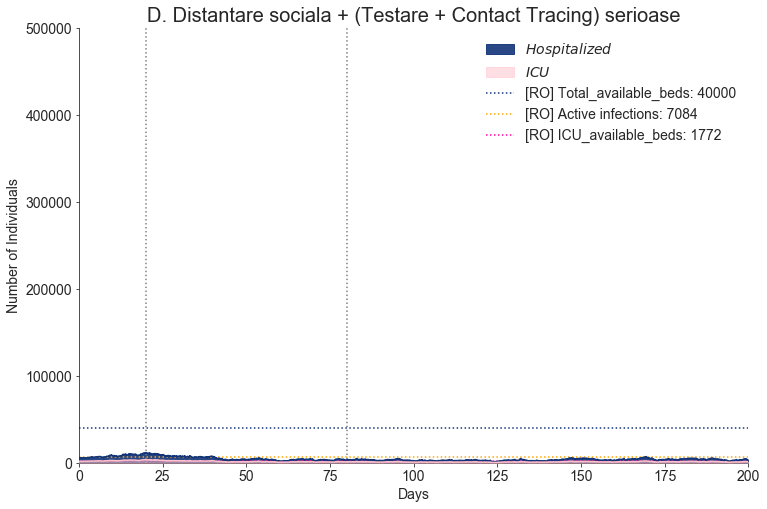

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a693d9550>)

In [392]:
model_test_trace = SEIRSNetworkModel(G       =G_normal, 
                          beta    =beta,
                          sigma   =sigma,
                          gamma   =gamma, 
                          mu_I    =mu_I,
                          mu_H    =mu_H, 
                          mu_ICU  =mu_ICU,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          Q       =G_quarantine,  # the interactions after a positive test
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                          phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                          psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals
                          p=0.5, # probability of global interactions (network locality)
                          q=0.5, # probability of global interactions for quarantined individuals
                          initI=initI,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
checkpoints = None
checkpoints = {'t':       [20, 80], 
               'G':       [G_distancing_strict, G_distancing_light],
               'p':       [0.1, 0.5], # probability of global interactions (network locality)
               'q':       [0.1, 0.5], # probability of global interactions (network locality)
               'theta_E': [0.05, 0.05], # rate of testing for exposed individuals
               'theta_I': [0.1, 0.1], # rate of testing for infectious individuals
               'phi_E':   [0.1, 0.1], # phi_E rate of contact tracing testing for exposed individuals
               'phi_I':   [0.2, 0.2] # phi_I rate of contact tracing testing for infectious individuals
              }
model_test_trace.run(T=num_iters, print_interval=50, checkpoints=checkpoints)

model_test_trace.figure_infections(
    plot_percentages=False,
    title="D. Distantare sociala + (Testare + Contact Tracing) serioase",
    ylim=500000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)

# E. Probabil situatia actuala Romania

t = 0.08
[Checkpoint: Updating parameters]
t = 50.01
[Checkpoint: Updating parameters]
t = 100.13
t = 150.00
t = 200.02


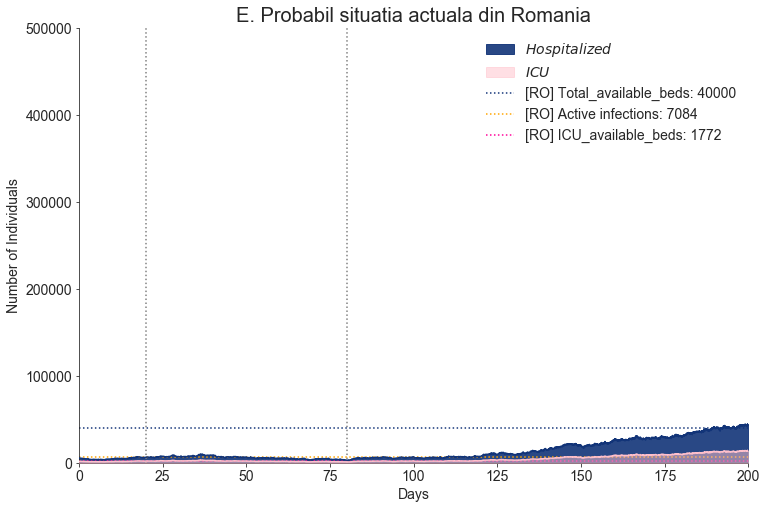

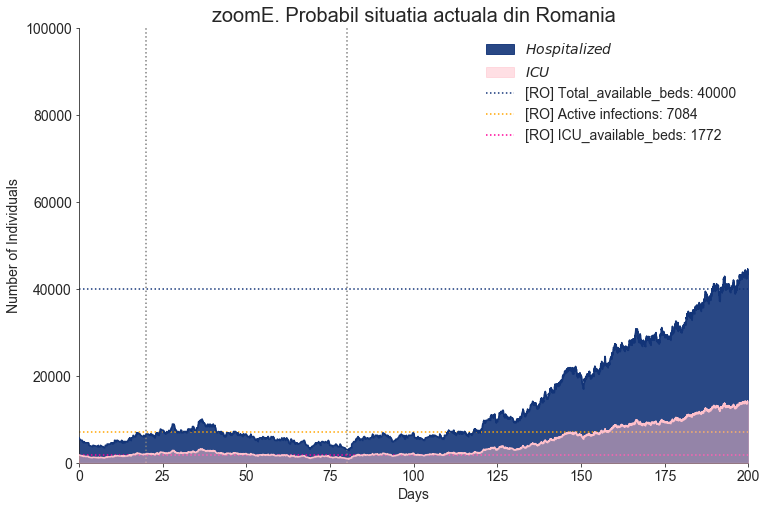

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24f9d470>)

In [8]:
model_ro = SEIRSNetworkModel(G       =G_normal, 
                          beta    =beta,
                          sigma   =sigma,
                          gamma   =gamma, 
                          mu_I    =mu_I,
                          mu_H    =mu_H, 
                          mu_ICU  =mu_ICU,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          Q       =G_quarantine,  # the interactions after a positive test
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                          phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                          psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals
                          p=0.5, # probability of global interactions (network locality)
                          q=0.5, # probability of global interactions for quarantined individuals
                          initI=initI,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
checkpoints = None
# 16 martie/Stare de Urgenta start = ziua 20
# 25 aprilie = ziua 60
# 15 mai = ziua 80
# 1 mai = ziua 66

checkpoints = {'t':       [20, 80], 
               'G':       [G_distancing_strict, G_distancing_light],
               'p':       [0.1, 0.5], # probability of global interactions (network locality)
               'q':       [0.1, 0.5], # probability of global interactions (network locality)
               'theta_E': [0.01, 0.02], # rate of testing for exposed individuals
               'theta_I': [0.02, 0.03], # rate of testing for infectious individuals
               'phi_E':   [0.1, 0.1], # phi_E rate of contact tracing testing for exposed individuals
               'phi_I':   [0.2, 0.2] # phi_I rate of contact tracing testing for infectious individuals
              }
model_ro.run(T=num_iters, print_interval=50, checkpoints=checkpoints)

model_ro.figure_infections(
    plot_percentages=False,
    title="E. Probabil situatia actuala din Romania",
    ylim=500000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)

model_ro.figure_infections(
    plot_percentages=False,
    title="zoomE. Probabil situatia actuala din Romania",
    ylim=100000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)

t = 0.27
[Checkpoint: Updating parameters]
t = 50.00
[Checkpoint: Updating parameters]
t = 100.00
t = 150.11
t = 200.02


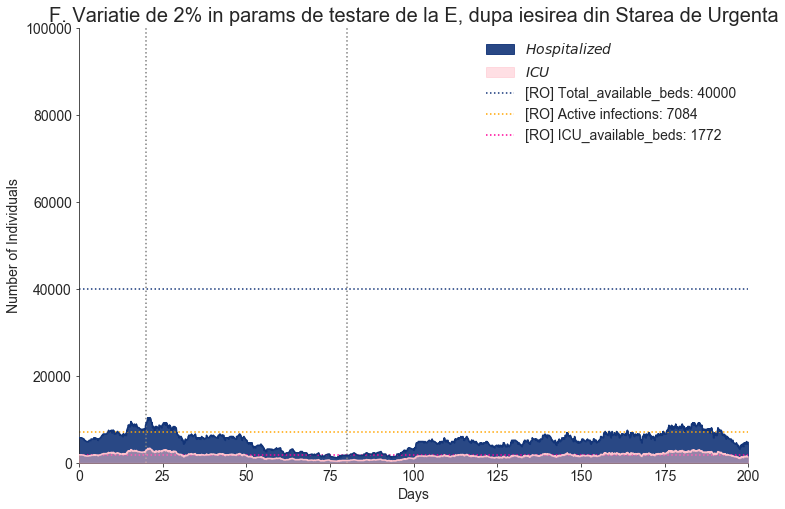

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24974e80>)

In [9]:
model_ro = SEIRSNetworkModel(G       =G_normal, 
                          beta    =beta,
                          sigma   =sigma,
                          gamma   =gamma, 
                          mu_I    =mu_I,
                          mu_H    =mu_H, 
                          mu_ICU  =mu_ICU,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          Q       =G_quarantine,  # the interactions after a positive test
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, # phi_E rate of contact tracing testing for exposed individuals
                          phi_I   =0, # phi_I rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,  # psi_E probability of positive tests for exposed individuals
                          psi_I   =1.0,  # psi_I probability of positive tests for infectious individuals
                          p=0.5, # probability of global interactions (network locality)
                          q=0.5, # probability of global interactions for quarantined individuals
                          initI=initI,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
checkpoints = None
# 16 martie/Stare de Urgenta start = ziua 20
# 25 aprilie = ziua 60
# 15 mai = ziua 80
# 1 mai = ziua 66

checkpoints = {'t':       [20, 80], 
               'G':       [G_distancing_strict, G_distancing_light],
               'p':       [0.1, 0.5], # probability of global interactions (network locality)
               'q':       [0.1, 0.5], # probability of global interactions (network locality)
               'theta_E': [0.02, 0.04], # rate of testing for exposed individuals
               'theta_I': [0.03, 0.05], # rate of testing for infectious individuals
               'phi_E':   [0.1, 0.1], # phi_E rate of contact tracing testing for exposed individuals
               'phi_I':   [0.2, 0.2] # phi_I rate of contact tracing testing for infectious individuals
              }
model_ro.run(T=num_iters, print_interval=50, checkpoints=checkpoints)

model_ro.figure_infections(
    plot_percentages=False,
    title="F. Variatie de 2% in params de testare de la E, dupa iesirea din Starea de Urgenta",
    ylim=100000,
    vlines=checkpoints["t"],
    plot_F=False,
    plot_I=False,
    plot_E=False,
)